In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('NMF').getOrCreate()

import numpy as np 
from sklearn.decomposition import non_negative_factorization

X = np.array([[5,2,4,6], [3,4,6,2], [7, 3, 12, 25]])

W, H, n_iter = non_negative_factorization(X, n_components=3, init='random', random_state=0)

print(f'X = {X}')
print(f'H = {H}')
print(f'W = {W}')
print(f'n_iter = {n_iter}')


X = [[ 5  2  4  6]
 [ 3  4  6  2]
 [ 7  3 12 25]]
H = [[2.28336778 0.52604177 1.44391556 3.275838  ]
 [1.71591176 2.18138626 2.85203481 0.        ]
 [0.         0.20478958 1.1180312  2.20805254]]
W = [[1.83180791 0.47529316 0.        ]
 [0.         1.74861851 0.90585817]
 [3.06610302 0.         6.77335278]]
n_iter = 60


In [7]:
Y = np.dot(W,H)
print(Y)

[[ 4.99825227  2.00040542  4.00052857  6.00070596]
 [ 3.00047505  3.99992269  5.99989855  2.00018243]
 [ 7.00104083  3.00001034 12.00001357 24.9999756 ]]


In [9]:
n_samples = 1000
timeframe = np.linspace(0,50, n_samples)
print(timeframe)

[ 0.          0.05005005  0.1001001   0.15015015  0.2002002   0.25025025
  0.3003003   0.35035035  0.4004004   0.45045045  0.5005005   0.55055055
  0.6006006   0.65065065  0.7007007   0.75075075  0.8008008   0.85085085
  0.9009009   0.95095095  1.001001    1.05105105  1.1011011   1.15115115
  1.2012012   1.25125125  1.3013013   1.35135135  1.4014014   1.45145145
  1.5015015   1.55155155  1.6016016   1.65165165  1.7017017   1.75175175
  1.8018018   1.85185185  1.9019019   1.95195195  2.002002    2.05205205
  2.1021021   2.15215215  2.2022022   2.25225225  2.3023023   2.35235235
  2.4024024   2.45245245  2.5025025   2.55255255  2.6026026   2.65265265
  2.7027027   2.75275275  2.8028028   2.85285285  2.9029029   2.95295295
  3.003003    3.05305305  3.1031031   3.15315315  3.2032032   3.25325325
  3.3033033   3.35335335  3.4034034   3.45345345  3.5035035   3.55355355
  3.6036036   3.65365365  3.7037037   3.75375375  3.8038038   3.85385385
  3.9039039   3.95395395  4.004004    4.05405405  4

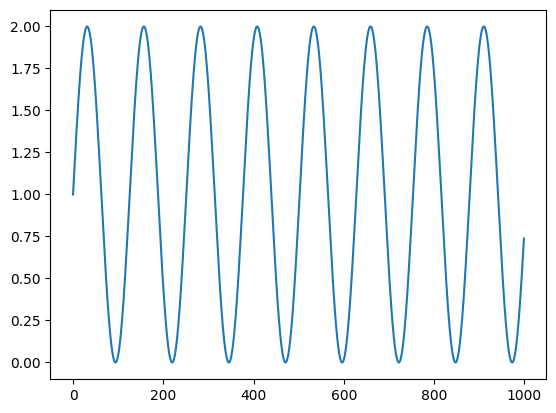

In [11]:
import matplotlib.pyplot as plt

s1 = np.sin(timeframe)+1
plt.plot(s1.T)

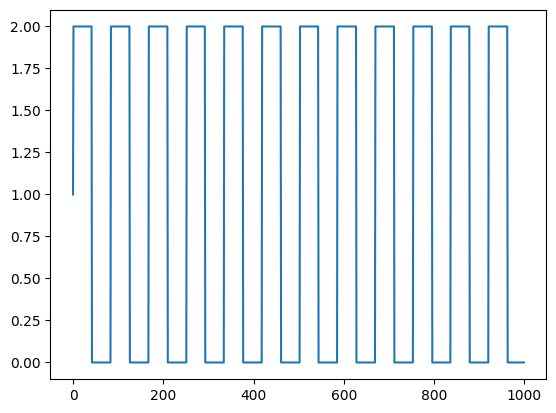

In [12]:
s2 = np.sign(np.sin(timeframe*1.5)) + 1
plt.plot(s2)

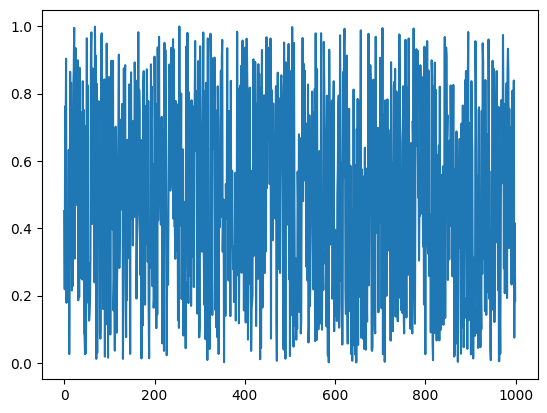

In [13]:
s3 = np.random.rand(n_samples)
plt.plot(s3)

In [18]:
def plotMatrix(s):
    m,n = s.shape
    if m<n:
        s = s.T
    m, n = s.shape
    plt.subplots(figsize=(8,7))
    x = np.arange(m)
    for j in range(n):
        plt.subplot(n, 1, j+1)
        plt.plot(x, s[:,j])

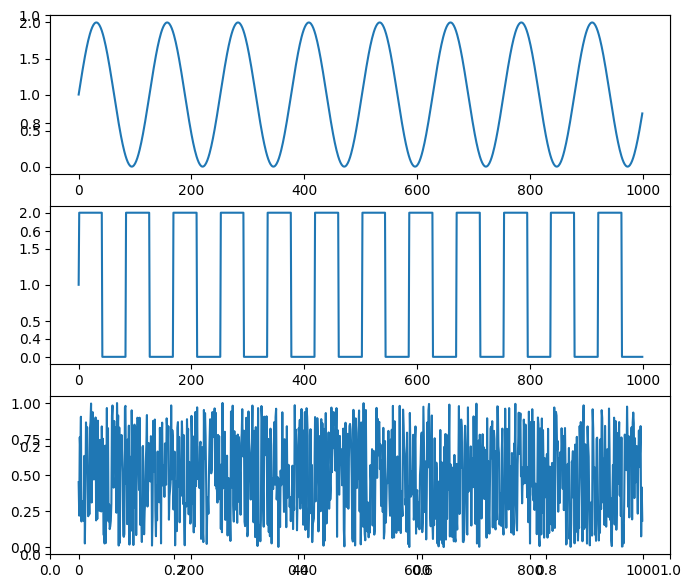

In [19]:
S = np.vstack([s1, s2, s3])
plotMatrix(S)

In [26]:
A = np.random.rand(3,3)
print(A)

[[0.46793355 0.04153711 0.44334768]
 [0.43437662 0.14817596 0.56338842]
 [0.88475491 0.08018267 0.00700158]]


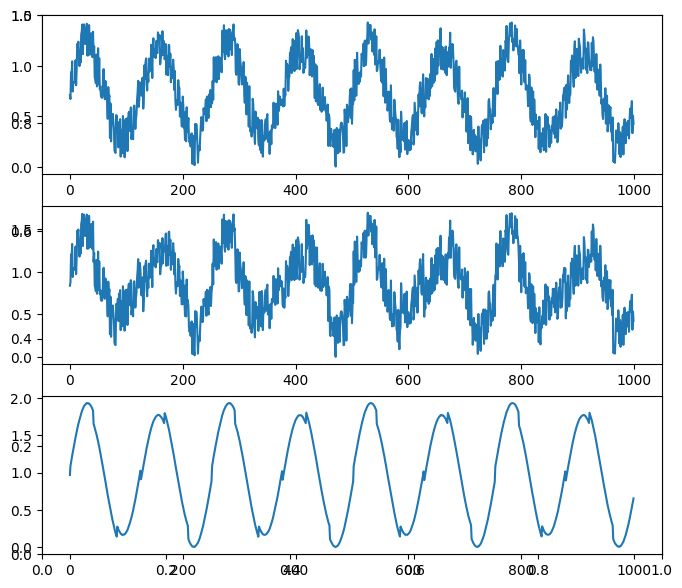

In [27]:
Z = np.dot(A, S)
plotMatrix(Z)

In [28]:
W, H, n_iter = non_negative_factorization(Z, n_components=3, init='random', random_state=0, max_iter=1000)

/home/cuongvosgh/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


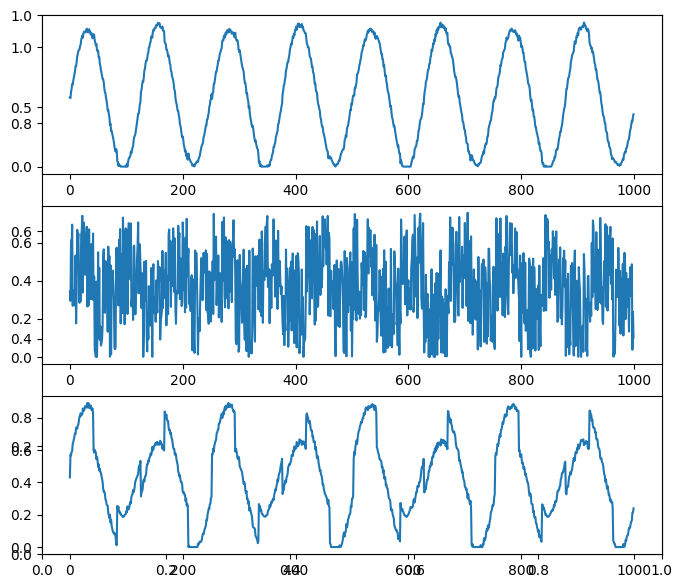

In [29]:
plotMatrix(H)

A_=[[-0.12137181 -0.32891847  0.04253709]
 [-0.15600137 -0.30414428  0.14989084]
 [ 0.01034266 -0.62648946  0.07745464]]


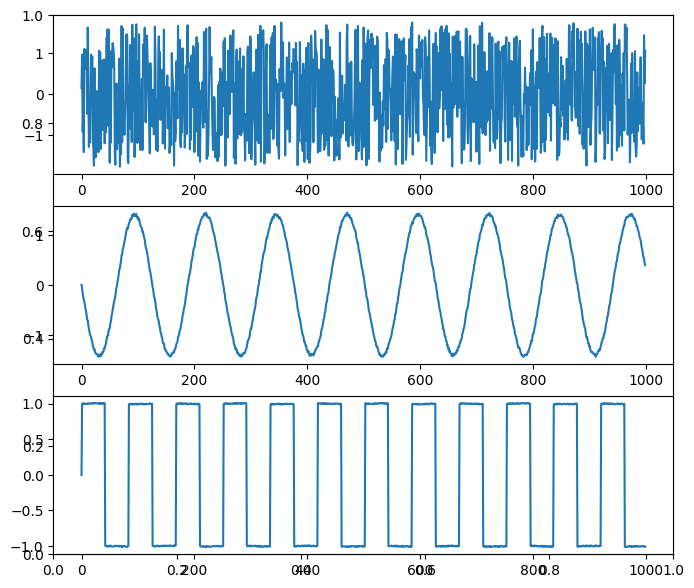

In [30]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
S_ = ica.fit_transform(Z.T)

A_ = ica.mixing_

print(f'A_={A_}')

plotMatrix(S_)